In [1]:
import xarray as xr

In [2]:
import metpy
import metpy.io
import datetime

In [3]:
gemdata = metpy.io.GempakGrid('18z06252019.gem')

In [4]:
valid_time = datetime.datetime(2019, 6, 25, 18, 0)

In [5]:
tmpk = gemdata.gdxarray(parameter='TMPK', coordinate='PRES', date_time=valid_time)

In [6]:
tmpk = [da.squeeze('time') for da in tmpk]

In [7]:
ds = xr.merge(tmpk).metpy.assign_latitude_longitude()

In [8]:
ds

<xarray.Dataset>
Dimensions:    (pres: 37, x: 301, y: 225)
Coordinates:
  * pres       (pres) int64 100 125 150 175 200 225 ... 875 900 925 950 975 1000
  * x          (x) float32 -3.332e+06 -3.312e+06 ... 2.743e+06 2.763e+06
  * y          (y) float32 2.279e+06 2.299e+06 2.32e+06 ... 6.81e+06 6.83e+06
    time       datetime64[ns] 2019-06-25T18:00:00
    metpy_crs  object Projection: lambert_conformal_conic
    latitude   (y, x) float64 16.28 16.32 16.36 16.4 ... 55.61 55.57 55.52 55.48
    longitude  (y, x) float64 -126.1 -126.0 -125.8 ... -57.9 -57.64 -57.38
Data variables:
    tmpk       (pres, y, x) float32 195.9 196.0 196.1 ... 273.9 273.9 273.9
Attributes:
    gempak_grid_type:  forecast

In [9]:
#ds['tmpk'][:,100,200].plot()

In [10]:
#ds['latitude'][100,200].values

In [11]:
#ds['longitude'][100,200].values

In [12]:
mylat = 40.40
mylon = -94.92

In [13]:
import numpy as np

In [14]:
distances = np.hypot(mylat-ds['latitude'], mylon-ds['longitude'])

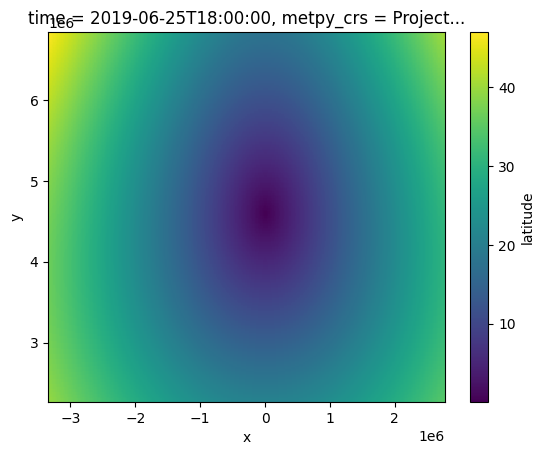

In [15]:
distances.plot()

In [16]:
minima = distances.argmin(...)

In [17]:
myx = minima['x'].values
myy = minima['y'].values

In [18]:
myx

array(164)

In [19]:
myy

array(114)

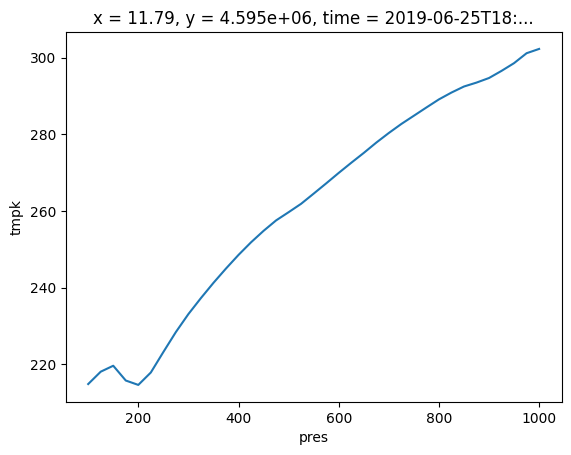

In [20]:
ds['tmpk'][:,myy,myx].plot()

In [21]:
ds['latitude'][myy,myx].values

array(40.34087517)

In [22]:
ds['longitude'][myy,myx].values

array(-94.99986606)

In [23]:
ds['tmpk'][:,myy,myx]

<xarray.DataArray 'tmpk' (pres: 37)>
array([214.8742 , 218.0979 , 219.64615, 215.7937 , 214.64615, 217.88374,
       223.22061, 228.4337 , 233.11874, 237.28998, 241.25702, 244.98909,
       248.54059, 251.82701, 254.81558, 257.53848, 259.67874, 261.87622,
       264.51935, 267.19336, 269.92   , 272.56128, 275.13455, 277.8242 ,
       280.3302 , 282.6839 , 284.82825, 286.97934, 289.09204, 290.8709 ,
       292.4492 , 293.4704 , 294.66714, 296.52844, 298.5446 , 301.1305 ,
       302.25174], dtype=float32)
Coordinates:
  * pres       (pres) int64 100 125 150 175 200 225 ... 875 900 925 950 975 1000
    x          float32 11.79
    y          float32 4.595e+06
    time       datetime64[ns] 2019-06-25T18:00:00
    metpy_crs  object Projection: lambert_conformal_conic
    latitude   float64 40.34
    longitude  float64 -95.0
Attributes:
    gempak_grid_type:  forecast